In [476]:
# %pip install pandas
# %pip install langchain langchain_community
# %pip install neo4j
# %pip install langchain_openai
# %pip install python-dotenv
# %pip install chromadb
# %pip install "numpy<2"
# %pip install networkx
# %pip install matplotlib
# %pip install dowhy

In [477]:
import pandas as pd
import os
from langchain_community.graphs import Neo4jGraph
from langchain_core.messages import AIMessage
from langchain_openai import AzureChatOpenAI, AzureOpenAIEmbeddings
from dotenv import load_dotenv

In [545]:
os.environ['NEO4J_URI'] = 'bolt://localhost:7690'
os.environ['NEO4J_USERNAME'] = 'neo4j'
os.environ['NEO4J_PASSWORD'] = 'Password@123'
graph = Neo4jGraph()

In [479]:
load_dotenv()

# os.environ["AZURE_OPENAI_API_KEY"] = os.getenv("AZURE_OPENAI_API_KEY")
# os.environ["AZURE_OPENAI_ENDPOINT"] = "https://sriks-openai.openai.azure.com/"
# os.environ["AZURE_OPENAI_API_VERSION"] = "2024-05-01-preview"
# os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT"] = "gpt-4o"
# os.environ["AZURE_OPENAI_EMBEDDINGS_DEPLOYMENT"] = "text-embedding-ada-002"

# llm = AzureChatOpenAI(
#     openai_api_version=os.environ["AZURE_OPENAI_API_VERSION"],
#     azure_deployment=os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT"],
# )

# embeddings = AzureOpenAIEmbeddings(
#     openai_api_version=os.environ["AZURE_OPENAI_API_VERSION"],
#     azure_deployment=os.environ["AZURE_OPENAI_EMBEDDINGS_DEPLOYMENT"],
# )

True

In [480]:
# examples = [
#     {
#         "question": "What is the root cause request id 8ff8696695aa73588ac454809741e2ea",
#         "query": "MATCH (n)-[r:DEPENDS_ON]->(m) where n.id <> 'ROOT' OR m.id <> 'ROOT' and r.operationId = 8ff8696695aa73588ac454809741e2ea RETURN n.id, r.duration, r.operation_Name, m.id ORDER BY r.duration DESC LIMIT 3",
#     },
#     {
#         "question": "what is the longest running operation",
#         "query": "MATCH (n)-[r:DEPENDS_ON]->(m) where n.id <> 'ROOT' OR m.id <> 'ROOT' RETURN n.id, r.duration, r.operation_Name, m.id ORDER BY r.duration DESC LIMIT 3",
#     }
# ]

In [481]:
# from langchain.chains import GraphCypherQAChain
# from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate
# from langchain_core.example_selectors import SemanticSimilarityExampleSelector, MaxMarginalRelevanceExampleSelector
# from langchain.vectorstores import Chroma
# from langchain.chains.llm import LLMChain
# from langchain.chains.graph_qa.cypher import construct_schema
# from langchain.chains import SimpleSequentialChain, SequentialChain
# from langchain.agents import AgentType, initialize_agent, load_tools

# # load human intervention tools
# tools = load_tools(
#     ["human"], llm
# )

# graph.refresh_schema()

# QA_GENERATION_TEMPLATE = """
#        Task: answer the question you are given based on the context provided.
#        Instructions:
#         You are an assistant that helps to form nice and human understandable answers. 
#         Use the context information provided to generate a well organized and comprehensve answer to the user's question. 
#         When the provided information contains multiple elements, structure your answer as a bulleted or numbered list to enhance clarity and readability.
#         You must use the information to construct your answer. 
#         The provided information is authoritative; do not doubt it or try to use your internal knowledge to correct it. 
#         Make the answer sound like a response to the question without mentioning that you based the result on the given information. 
#         If there is no information provided, say that the knowledge base returned empty results.

#         Here's the information:
#         {context}

#         Question: {question}
#         Answer:
#             """
# EXAMPLES_PROMPT_TEMPLATE = """   
#                 Input: {question},
#                 Output: {query}
#             """

# qaPrompt = PromptTemplate(input_variables=["context", "question"], template=QA_GENERATION_TEMPLATE)

# example_prompt = PromptTemplate(input_variables=["question", "query"], template=EXAMPLES_PROMPT_TEMPLATE)

# cypherPromptTemplate = """
# You are an expert Neo4j Developer translating user questions into Cypher to answer questions.
# Convert the user's question based on the schema.
# Instructions: Use only the provided relationship types and properties in the schema.
# Do not use any other relationship types or properties that are not provided.
# Schema:
# {schema}

# Note: Do not include any explanations or apologies in your responses.
# Do not respond to any questions that might ask anything else than for you to construct a Cypher statement.
# Do not include any text except the generated Cypher statement.

# Important: In the generated Cypher query, the RETURN statement must explicitly include the property values used in the query's filtering condition, alongside the main information requested from the original question.

# Question: {question}
# input:
# """

# similaritySelector = SemanticSimilarityExampleSelector.from_examples(
#     examples=examples, 
#     embeddings=embeddings, 
#     k=1,
#     vectorstore_cls=Chroma
# )

# cypherPrompt = FewShotPromptTemplate(
#     example_selector=similaritySelector,
#     example_prompt=example_prompt,
#     input_variables=["question", "schema"], 
#     prefix=cypherPromptTemplate,
#     suffix="the question is:{question}",
# )

# cypherqachain = GraphCypherQAChain.from_llm(
#     llm = llm,
#     return_intermediate_steps=True,
#     validate_cypher=True,
#     graph=graph, 
#     verbose=True,
#     k=3,
#     use_function_response=True,
#     cypherPrompt=cypherPrompt,
#     return_direct=True,
#     output_key="input",
# ) 

# schema  = construct_schema(graph.get_structured_schema, [], [])

In [482]:
# # Test cypher chain invocation
# cypherqachain.invoke({"query": "which nodes has max azure dependencies"})

In [483]:
# import matplotlib
# nx.draw(graph, with_labels=True, font_weight='bold')

[Work In Progress]

In [488]:
# pc_df = pd.read_csv('perf_counters.csv')
# pc_df['TimeGenerated'] = pd.to_datetime(pc_df['TimeGenerated'])
# pc_df = pc_df[pc_df['CounterName'].isin(['memoryWorkingSetBytes', 'cpuUsageNanoCores'])]
# print(f'Number of records: {len(pc_df)}')
# pc_df.head()

In [489]:
# def minimize_scale(x):
#     if x['CounterName'] == 'memoryWorkingSetBytes':
#         return x['avg_CounterValue'] / 1000000
#     elif x['CounterName'] == 'cpuUsageNanoCores':
#         return x['avg_CounterValue'] / 1e9
    
# def parseServiceName(x):
#     splits = x.split('/')
#     servicename = splits[-1]
#     return servicename

# def parseInstanceId(x):
#     splits = x.split('/')
#     instanceid = splits[-2]
#     return instanceid

# # reducing the scale of countervalue
# regex_filter_for_services = 'api'
# pc_df['ServiceName'] = pc_df['InstanceName'].apply(lambda x: parseServiceName(x))
# pc_df = pc_df[pc_df['ServiceName'].str.contains(regex_filter_for_services)]
# pc_df['avg_CounterValue'] = pc_df['CounterValue'].astype(float) 
# pc_df['avg_CounterValue'] = pc_df.apply(minimize_scale, axis=1)
# pc_df.drop(columns=['InstanceName', 'CounterValue'], inplace=True)
# # only keep rows that have api in service name
# # to make it general, we can get the services from the user and then filter based on that
# pc_df.head(1)

In [490]:
# # Considering only CPU Usage
# cpu_pc_df = pc_df[pc_df['CounterName'].str.contains('cpuUsageNanoCores')]

In [491]:
# def format_services_for_cypher(services):
#    services = cpu_pc_df['ServiceName'].unique().tolist()
#    services = [f'"{service}"' for service in services]
#    services = "[" + ",".join(services) + "]"
#    return services
# services = format_services_for_cypher(cpu_pc_df['ServiceName'].unique().tolist())
# print(services)

## Root cause analysis using Response Times

In [546]:
from rca_buider import get_data, get_data_from_graph

df_operationIds_anomaly, df_operationIds_normal = get_data_from_graph(graph)
normal_data, graph = get_data(df_operationIds_normal, filter="r.total_duration <= 2000")
anomaly_data, _= get_data(df_operationIds_anomaly, filter="r.total_duration > 2000")

In [289]:
# f_pc_df = cpu_pc_df[cpu_pc_df.apply(lambda x: x['ServiceName'] in services_in_graph, axis=1)]
# len(f_pc_df)

In [511]:
# operation_dt = pd.to_datetime(operation_dt)
# end = operation_dt + pd.Timedelta('1 h')
# pc_df_anomalies = f_pc_df[(f_pc_df['TimeGenerated'] >= operation_dt) & (f_pc_df['TimeGenerated'] <= end)].reset_index(drop=True)
# print(f'Number of records: {len(pc_df_anomalies)}')
# pc_df_normal = f_pc_df[(f_pc_df['TimeGenerated'] < operation_dt)].reset_index(drop=True)
# print(f'Number of records: {len(pc_df_normal)}')
# pc_df_anomalies.head()

In [512]:
# def pivot_and_add_columns(df):
#     df = df.groupby(['TimeGenerated', 'ServiceName']).max().reset_index()
#     df = df.pivot(index='TimeGenerated', columns='ServiceName', values='avg_CounterValue').reset_index()
#     df = df.fillna(0)
#     df.drop(columns=['TimeGenerated'], inplace=True)
#     df.index.name = None
#     df.columns.name = None
#     return df

# df_anomalies = pivot_and_add_columns(pc_df_anomalies)
# df_normal = pivot_and_add_columns(pc_df_normal)
# df_anomalies.head(2)

In [518]:
from dowhy import gcm
from scipy.stats import halfnorm
from dowhy.utils import plot, bar_plot

causal_model = gcm.StructuralCausalModel(graph)
for node in graph.nodes:
    if len(list(graph.predecessors(node))) > 0:
        # for all nodes with parents, we are using the linear regression model. 
        # in real world we need to use the appropriate model based on the data distribution.
        causal_model.set_causal_mechanism(node, gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
    else:
        # for all nodes without parents, we are using the half normal distribution.
        # in real world we need to use the appropriate model based on the data distribution.
        causal_model.set_causal_mechanism(node, gcm.ScipyDistribution(halfnorm))

In [535]:
anomaly_data

,"SQL: tcp:core-cdcn-sql-perf.database.windows.net,1433 | RuleEngineExecutionLog","SQL: tcp:core-cdcn-sql-perf.database.windows.net,1433 | RuleEngineExecutionLog","SQL: tcp:u2-sql-perf.database.windows.net,1433 | U2Entity_cdnv","SQL: tcp:u2-sql-perf.database.windows.net,1433 | U2Entity_cdtn","SQL: tcp:u2-sql-perf.database.windows.net,1433 | U2Role",authorization-api,core-apim-shared-perf West US,core-func-ruleengine-perf,core-func-shift-perf,payroll-api,people-api,rules-api,u2-api,ROOT
0,0.034980,0.021368,0.000000,0.295009,0.001661,13.081816,9.136191,10.028200,0.110399,0.008627,16.254143,9.203931,0.480365,1
1,0.508067,0.028997,0.000000,0.826923,1.004121,4.727676,9.461322,10.396208,0.123611,0.008272,12.068036,8.856363,1.319858,1
2,0.054537,0.022830,0.284285,0.000000,0.001798,7.506592,4.391611,5.528838,0.172187,0.349634,3.415194,4.398937,0.593024,1
3,0.034180,0.025044,0.000000,1.797101,0.004459,24.087987,8.678279,9.504331,0.133843,6.233111,5.426669,8.739885,1.547453,1
4,0.039699,0.021578,0.000000,0.527130,0.000000,7.957816,8.850711,9.810368,0.184996,0.010389,5.394450,8.687817,0.078401,1
5,0.041712,0.042037,0.000000,0.253649,0.006553,1.901941,5.797599,6.822240,0.131128,2.856018,2.637160,6.566820,0.527733,1
6,0.062050,0.032173,0.286167,0.000000,0.143644,4.161260,12.705366,13.275440,0.175719,0.009185,14.957538,12.723684,0.841004,1
7,0.058121,0.018818,0.000000,0.114651,1.381507,3.711570,9.023189,9.969945,0.115872,0.008487,0.483976,8.849102,1.956459,1
8,0.180173,0.035275,0.000000,0.369212,0.908921,2.226027,9.185700,10.034542,0.129925,1.952676,1.199395,8.457771,1.103957,1
9,0.434236,0.025138,0.000000,0.159770,0.011022,4.416864,13.065861,13.855954,0.126095,0.013184,17.184648,12.360003,0.385181,1


In [522]:
gcm.fit(causal_model, normal_data)

Fitting causal mechanism of node ROOT:   0%|          | 0/13 [00:00<?, ?it/s]c:\code\sriksml\.venv\Lib\site-packages\scipy\_lib\_util.py:798: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return fun(*args, **kwargs)
Fitting causal mechanism of node SQL: tcp:u2-sql-perf.database.windows.net,1433 | U2Entity_cdtn: 100%|██████████| 13/13 [00:00<00:00, 266.20it/s]       


In [523]:
result = gcm.evaluate_causal_model(causal_model, normal_data, compare_mechanism_baselines = True)

Test permutations of given graph: 100%|██████████| 50/50 [00:13<00:00,  3.81it/s]


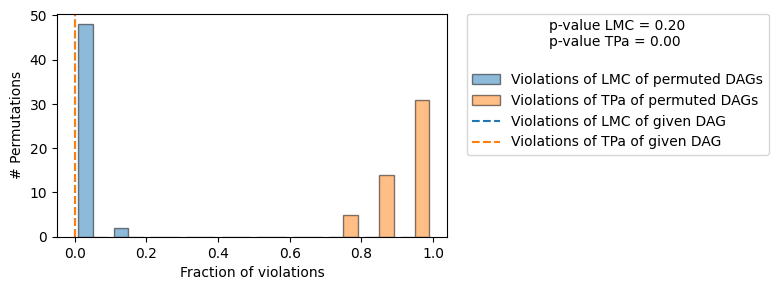

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [524]:
print(result)

In [544]:
# gcm.config.disable_progress_bars() # to disable print statements when computing Shapley values

median_attribs, uncertainty_attribs = gcm.confidence_intervals(
    gcm.fit_and_compute(gcm.attribute_anomalies,
                        causal_model,
                        normal_data,
                        target_node='rules-api',
                        anomaly_samples=anomaly_data),
    num_bootstrap_resamples=5)

c:\code\sriksml\.venv\Lib\site-packages\scipy\_lib\_util.py:798: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return fun(*args, **kwargs)
c:\code\sriksml\.venv\Lib\site-packages\scipy\_lib\_util.py:798: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return fun(*args, **kwargs)
c:\code\sriksml\.venv\Lib\site-packages\scipy\_lib\_util.py:798: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return fun(*args, **kwargs)
c:\code\sriksml\.venv\Lib\site-packages\scipy\_lib\_util.py:798: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly iden

ValueError: Estimate bounds currently only supports one dimensional inputs!

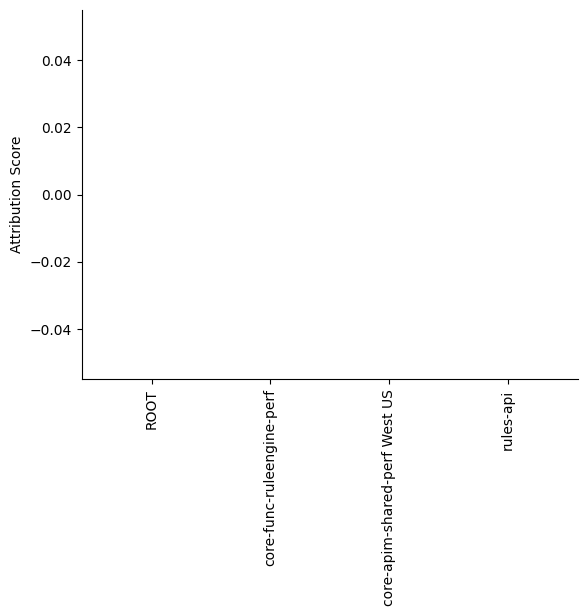

In [543]:
bar_plot(median_attribs, uncertainty_attribs, 'Attribution Score')